In [32]:
#import station

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [49]:
def prepare_workout_data(file_path):
    
    """
    To prepare the workout data for visualization, a number of transformations 
    will be applied after reading in the raw DataFrame to memory, including:
        - reducing the number of columns to only those needed for later analysis
        - rename the columns to follow naming standards
        - removing records without any data
        - transform the time columns to the proper data types
        -fixing a discrepancy in the 'workout_name' column
    
    :param file_path: the file path where the raw smartphone data is stored
    :return: a cleaned dataset having had the operations above applied to it
    """

    
    if os.path.exists(file_path):
        raw_data = pd.read_csv(file_path)
    else:
        raise Exception(f"File containing workout data not found at path {file_path}")

    trimmed_data = raw_data.drop(['Notes', 'Workout Notes', 'RPE'], axis=1)  # dropping the columns not needed

    # renaming columns to follow naming standards
    trimmed_data.columns = ['date', 'workout_name', 'duration', 'exercise_name', 'set_order', 'weight', 'reps', 'distance', 'seconds']

    # transforming data types of select columns
    trimmed_data['date'] = pd.to_datetime(trimmed_data['date'])
    trimmed_data['duration'] = pd.to_timedelta(trimmed_data['duration'])

    #fixing a discrepancy in the 'workout_name' column
    trimmed_data['workout_name'] = trimmed_data['workout_name'].replace('Pullies ','Pullies')

    return trimmed_data

# Calling the function
clean_data = prepare_workout_data("./PY_strong.csv")


In [51]:
def input_date():

    """
    To provide the user with the option of setting a date range to analyse specific 
    time periods.
    

    :return: a matching dataset showing the selected time period
    """
    
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")

    # Convert input to datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)


    if start_date < end_date:
    # Filter DataFrame by date range
        data_range = clean_data[(clean_data["date"] >= start_date) & (clean_data["date"] <= end_date)]
    else:
        raise ValueError("start_date must be less than end_date")
        
    return data_range

#calling the function
filtered_data = input_date()

Enter start date (YYYY-MM-DD):  2025-02-02
Enter end date (YYYY-MM-DD):  2024-03-01


ValueError: start_date must be less than end_date

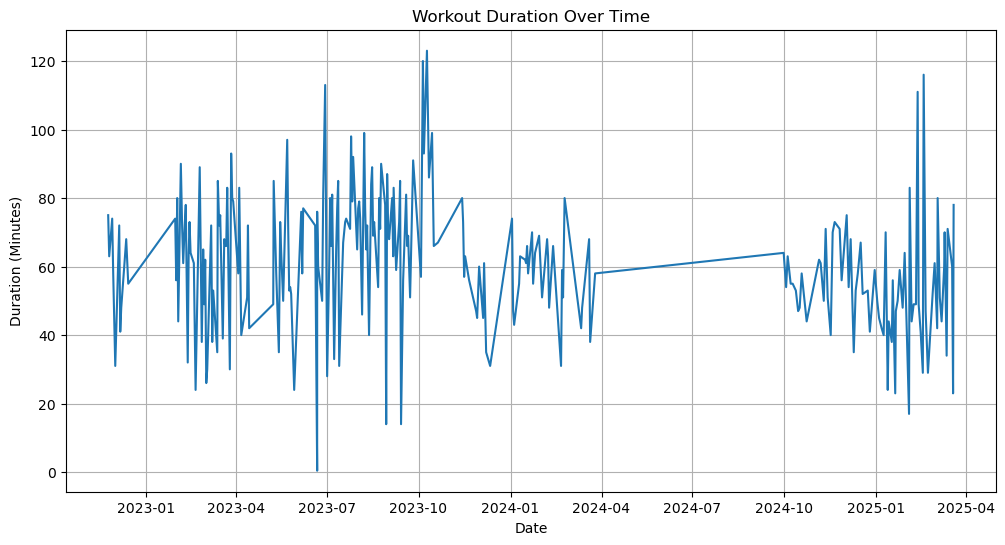

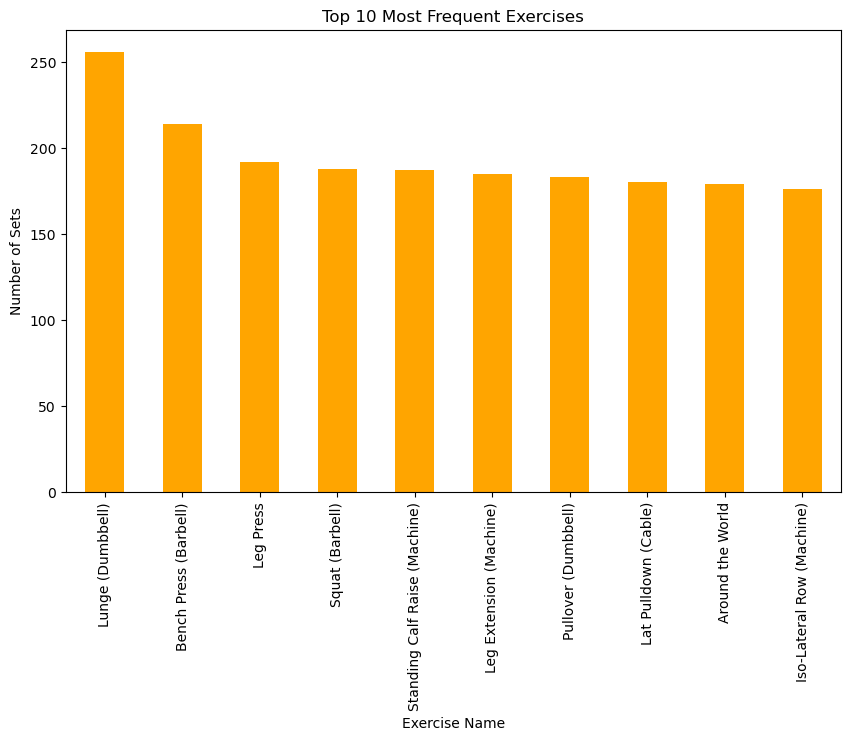

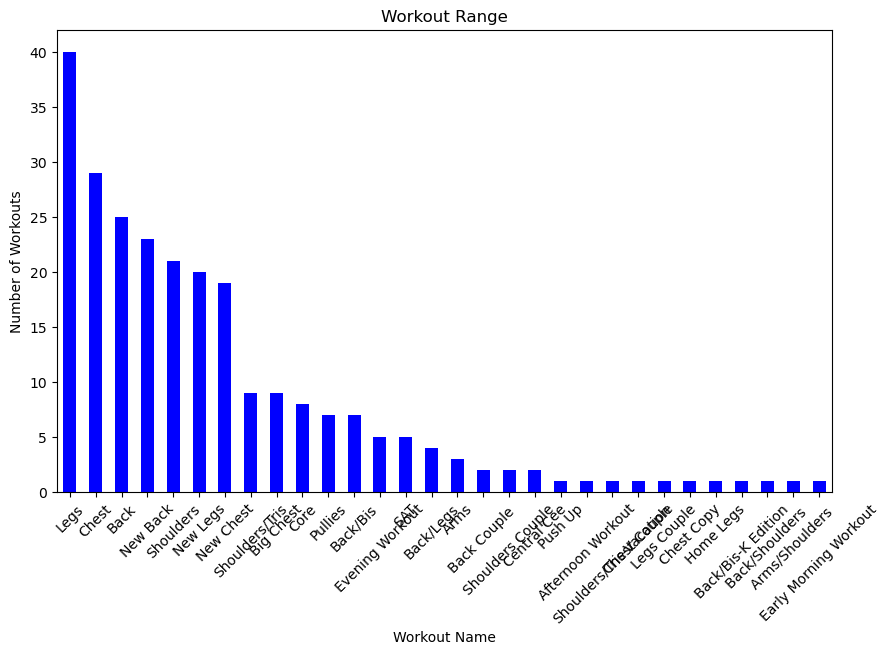

In [47]:
def plotting(df):

    """
    To prepare the filtered data for visualization, a number of transformations 
    will be applied:
        - creating 'duration_minutes' column to plot 'Workout Duration Over Time'
        - creating 'exercise_counts' to plot 'Top 10 Most Frequent Exercises' bar graph
        - transform the filtered_data to produce the 'Workout Range' plot
  
    
    :param df: the filtered dataset from the previous function
    :return: three different plots derived from the filtered dataset
    """    
    #converting the duration column data into minutes

    df['duration_minutes'] = df['duration'].dt.total_seconds() / 60

    #plotting the line graph using matplotlib

    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['duration_minutes'])
    plt.title('Workout Duration Over Time')
    plt.xlabel('Date')
    plt.ylabel('Duration (Minutes)')
    plt.grid(True)
    plt.show()


    #plotting the top 10 exercises

    #identifying the top 10 mentioned exercises in the specified date range

    exercise_counts = df['exercise_name'].value_counts().head(10)

    #plotting the bar graph

    exercise_counts.plot(kind='bar', figsize=(10, 6), color='orange')
    plt.title('Top 10 Most Frequent Exercises')
    plt.xlabel('Exercise Name')
    plt.ylabel('Number of Sets')
    plt.xticks(rotation=90)
    plt.show()    


    #plotting the number of workouts over the specified date range

    #dropping the columns not needed for this graph
    template_data = df.drop(['duration', 'exercise_name', 'set_order', 'weight', 'reps', 'distance', 'seconds'],axis=1)
    template_data = template_data.drop_duplicates()
    template_counts = template_data['workout_name'].value_counts()

    #plotting the bar graph

    template_counts.plot(kind='bar', figsize=(10, 6), color='blue')
    plt.title('Workout Range')
    plt.xlabel('Workout Name')
    plt.ylabel('Number of Workouts')
    plt.xticks(rotation=45)
    plt.show()


#calling the function
plotting(filtered_data)

In [36]:
#testing window
import pytest
import ipytest
ipytest.autoconfig() 




# Create a clean DataFrame fixture
@pytest.fixture()
def clean_workout_data():
    return prepare_workout_data("./Danline_strong.csv")

def test_nan_values(clean_workout_data):
    """
    Test for no NaN value for "workout_name" or "exercise_name"
    """
    
    # Assert there are no NaN value in "workout_name" or "exercise_name"
    assert clean_workout_data["workout_name"].isnull().sum() == 0
    assert clean_workout_data["exercise_name"].isnull().sum() == 0    


ipytest.run("-qq")

.                                                                                            [100%]


<ExitCode.OK: 0>